# This is a the Test Simulation for MWM RV Targets

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table,vstack
from targetlib import testfield_gal,testfield_fk5,testfield_ecl
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic,FK5,BarycentricTrueEcliptic
%matplotlib inline

## Read in Target and Cadence Tables

In [2]:
target_tab = Table.read('workspace/target_files/RV/MWM-RV-TargList-v03.fits')
cadence_tab = Table.read('workspace/target_files/RV/MWM-RVcadences.fits')
target_tab

RA,DEC,CADENCE,TYPE,PRIORITY,VALUE
float64,float64,bytes6,bytes2,int16,float32
133.242841,29.528027,rv6x1,rv,45,1.0
133.323908,29.092781,rv6x1,rv,45,1.0
133.371731,28.93314,rv6x1,rv,45,1.0
133.458772,28.698296,rv6x1,rv,45,1.0
133.55581,28.546553,rv6x1,rv,45,1.0
133.556491,29.097294,rv6x1,rv,45,1.0
133.567825,28.253328,rv6x1,rv,45,1.0
133.569309,28.328527,rv6x1,rv,45,1.0
133.592214,29.173113,rv6x1,rv,45,1.0


In [3]:
target_tab ['RA'].name = 'ra'
target_tab ['DEC'].name = 'dec'
target_tab ['CADENCE'].name = 'cadence'
target_tab ['TYPE'].name = 'type'
target_tab ['PRIORITY'].name = 'priority'
target_tab ['VALUE'].name = 'value'
target_tab

ra,dec,cadence,type,priority,value
float64,float64,bytes6,bytes2,int16,float32
133.242841,29.528027,rv6x1,rv,45,1.0
133.323908,29.092781,rv6x1,rv,45,1.0
133.371731,28.93314,rv6x1,rv,45,1.0
133.458772,28.698296,rv6x1,rv,45,1.0
133.55581,28.546553,rv6x1,rv,45,1.0
133.556491,29.097294,rv6x1,rv,45,1.0
133.567825,28.253328,rv6x1,rv,45,1.0
133.569309,28.328527,rv6x1,rv,45,1.0
133.592214,29.173113,rv6x1,rv,45,1.0


In [4]:
cadence_tab

cadence,nepochs,delta [72],softness [72],lunation [72],instrument [72]
bytes6,int32,float32,float32,float32,bytes6
rv6x1,6,0.0 .. nan,1.0 .. nan,100.0 .. nan,apogee ..
rv6x2,12,0.0 .. nan,1.0 .. nan,100.0 .. nan,apogee ..
rv6x4,24,0.0 .. nan,1.0 .. nan,100.0 .. nan,apogee ..
rv9x1,9,0.0 .. nan,1.0 .. nan,100.0 .. nan,apogee ..
rv9x2,18,0.0 .. nan,1.0 .. nan,100.0 .. nan,apogee ..
rv9x4,36,0.0 .. nan,1.0 .. nan,100.0 .. nan,apogee ..
rv12x1,12,0.0 .. nan,1.0 .. nan,100.0 .. nan,apogee ..
rv12x2,24,0.0 .. nan,1.0 .. nan,100.0 .. nan,apogee ..
rv12x4,48,0.0 .. nan,1.0 .. nan,100.0 .. nan,apogee ..


/usr/local/lib/student/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


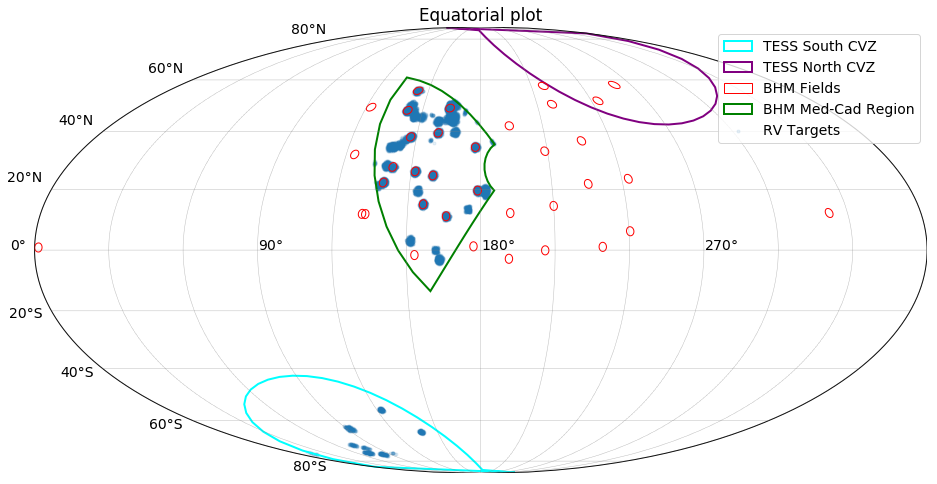

In [5]:
plt.rcParams.update({'font.size': 14})
(fig,bmap) = testfield_fk5()
#Plot WD Targets
rvx,rvy = bmap(target_tab['ra'],target_tab['dec'])
bmap.scatter(rvx,rvy,marker='.',label='RV Targets',alpha=0.1)
plt.title("Equatorial plot")
plt.legend()
plt.show()

## Updating Target Table

In [6]:
target_tab['priority'] = np.repeat(np.array(55,dtype='int32'),len(target_tab))
target_tab

ra,dec,cadence,type,priority,value
float64,float64,bytes6,bytes2,int32,float32
133.242841,29.528027,rv6x1,rv,55,1.0
133.323908,29.092781,rv6x1,rv,55,1.0
133.371731,28.93314,rv6x1,rv,55,1.0
133.458772,28.698296,rv6x1,rv,55,1.0
133.55581,28.546553,rv6x1,rv,55,1.0
133.556491,29.097294,rv6x1,rv,55,1.0
133.567825,28.253328,rv6x1,rv,55,1.0
133.569309,28.328527,rv6x1,rv,55,1.0
133.592214,29.173113,rv6x1,rv,55,1.0


In [7]:
target_tab.write('fps_rv_target.fits',overwrite=True)

## Update Cadence Table

## Let's fix lunation

In [8]:
fix_lunation = cadence_tab['lunation']
fix_lunation[(fix_lunation == 100)] = 1.0
cadence_tab['lunation'] = fix_lunation
cadence_tab[(cadence_tab['cadence'] == 'rv12x2')]['lunation'].data

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan]], dtype=float32)

## Let's change all the cadences to being separated by 0 instead of 0.01

In [9]:
print([ "{:0.2f}".format(float(x)) for x in cadence_tab[(cadence_tab['cadence'] == 'rv12x2')]['delta'].data[0]])

['0.00', '0.01', '3.00', '0.01', '3.00', '0.01', '30.00', '0.01', '3.00', '0.01', '3.00', '0.01', '300.00', '0.01', '3.00', '0.01', '3.00', '0.01', '30.00', '0.01', '3.00', '0.01', '3.00', '0.01', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan']


In [13]:
fix_delta = cadence_tab['delta']
fix_delta[(fix_delta > 0.009) & (fix_delta < 0.011)] = 0.0
fix_delta[(fix_delta > 0) & (fix_delta < 200)] = fix_delta[(fix_delta > 0) & (fix_delta < 200)] + 365
cadence_tab['delta'] = fix_delta
cadence_tab[(cadence_tab['cadence'] == 'rv12x2')]['delta'].data

/usr/local/lib/student/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/usr/local/lib/student/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


array([[   0.,    0.,  368.,    0.,  368.,    0.,  395.,    0.,  368.,
           0.,  368.,    0.,  300.,    0.,  368.,    0.,  368.,    0.,
         395.,    0.,  368.,    0.,  368.,    0.,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan]], dtype=float32)

## Let's change all the softnesses to being separated by 0.01 instead of 0.04
Basically give us an hour at most between observations. (Say for instance clouds came through)

In [14]:
fix_softness = cadence_tab['softness']
fix_softness[(fix_softness > 0.009) & (fix_softness < 0.011)] = 0.04
fix_softness[(fix_softness > 0.999) & (fix_softness < 10)] = 365
fix_softness[(fix_softness > 29) & (fix_softness < 31)] = 90
fix_softness[:,0] = 1
cadence_tab['softness'] = fix_softness
print([ "{:0.2f}".format(float(x)) for x in cadence_tab[(cadence_tab['cadence'] == 'rv18x4')]['softness'].data[0]])

['1.00', '0.04', '0.04', '0.04', '365.00', '0.04', '0.04', '0.04', '365.00', '0.04', '0.04', '0.04', '365.00', '0.04', '0.04', '0.04', '365.00', '0.04', '0.04', '0.04', '365.00', '0.04', '0.04', '0.04', '365.00', '0.04', '0.04', '0.04', '365.00', '0.04', '0.04', '0.04', '365.00', '0.04', '0.04', '0.04', '90.00', '0.04', '0.04', '0.04', '365.00', '0.04', '0.04', '0.04', '365.00', '0.04', '0.04', '0.04', '365.00', '0.04', '0.04', '0.04', '365.00', '0.04', '0.04', '0.04', '365.00', '0.04', '0.04', '0.04', '365.00', '0.04', '0.04', '0.04', '365.00', '0.04', '0.04', '0.04', '365.00', '0.04', '0.04', '0.04']


/usr/local/lib/student/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/usr/local/lib/student/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


In [ ]:
cadence_tab['instrument'][0]

In [ ]:
cadence_tab

In [ ]:
cadence_tab.write('fps_rv_cadence.fits',overwrite=True)